# Regresion lineal usando numpy
Este notebook implementa el algoritmo del descenso de gradiente para entrenar una regresion lineal

In [1]:
import numpy as np
from utils import load_regression_data

## Funciones para la regresion lineal


### Hipotesis
la hipotesis $h$ esta definida por $h(x) = \Theta^T * X$

In [2]:
def h(X, theta):
    'Hipotesis para la regresion lineal, devuelve una matriz de (1, m)'
    return np.dot(np.transpose(theta), X)

### Funcion de costo
La funcion de costo $J$ esta definida por $J(\Theta) = \frac{1}{2m} \sum_{i=1}^m (h(x^{(i)}) - y^{(i)})^2$

In [4]:
def J(X, y, theta):
    'Funcion de costo, devuelve un escalar'
    m = X.shape[1]
    return (1 / (2 * m)) * np.sum(np.square(h(X, theta) - y))

### Gradiente del costo con respecto a los parametros
El gradiente esta dado por $\frac{\partial J(\Theta)}{\partial \Theta_j} = \frac{1}{m}(h(x) - y)x_j$ para un solo parametro

Para una operacion vectorial podemos usar: $\nabla J(\Theta) = \frac{1}{m}(h(x) - y) * x^T$

In [5]:
def dJ(X, y, theta):
    'Gradiente del costo devuelve una matriz de (n + 1, 1)'
    m = X.shape[1]
    return (1 / m) * np.dot((h(X, theta) - y), np.transpose(X)).reshape((-1, 1))

## Importar y preprocesar el dataset
Para poder entrenar la regresion lineal de forma exitosa, se debe realizar un procesamiento previo (normalizacion)

In [6]:
X, y = load_regression_data()

In [7]:
X.shape

(10, 442)

In [8]:
y.shape

(1, 442)

In [9]:
np.mean(X, axis=1)

array([-3.63428493e-16,  1.30834257e-16, -8.04534920e-16,  1.28165452e-16,
       -8.83531559e-17,  1.32702421e-16, -4.57464634e-16,  3.77730150e-16,
       -3.83085422e-16, -3.41288202e-16])

In [10]:
np.std(X, axis=1)

array([0.04756515, 0.04756515, 0.04756515, 0.04756515, 0.04756515,
       0.04756515, 0.04756515, 0.04756515, 0.04756515, 0.04756515])

### Agregar una fila de 1's a la matriz X
Es necesario agregar una fila llena de 1 para que la matriz X sea conformable con $\Theta^T$

In [11]:
m = X.shape[1]
unos = np.ones((1, m))
X = np.append(unos, X, axis=0)

In [12]:
X.shape

(11, 442)

## Entrenamiento
Primero debemos inicializar los hiperparametros y luego ejecutar el bucle de entrenamiento usando descenso de gradiente

### Hiperparametros
Los hiperparametros son parametros o valores que podemos controlar pero que no son los parametros del modelo predictivo ($\Theta$)



In [13]:
alpha = 0.1
iteraciones = 500


### Inicializacion de los parametros de la regresion
Se recomienda inicializar los parametros $\Theta$ de forma aleatoria.


In [15]:

theta = np.random.random((X.shape[0], 1))

### Registro del entrenamiento
En cada iteracion del descenso de gradiente vamos a almacenar los valores de la funcion de costo y los gradientes

In [16]:
registro_grads = []
registro_J = []
J_init = J(X, y, theta)
print(f'Costo inicial: {J_init}')
registro_J.append(J_init)

Costo inicial: 14414.82050388779


## Descenso de gradiente


In [17]:
for i in range(iteraciones):
    # calcular la gradiente
    dtheta = dJ(X, y, theta)
    # actualizar parametros (descenso de gradiente)
    theta = theta - alpha * dtheta
    
    registro_J.append(J(X, y, theta))

print(f'Costo final: {J(X, y, theta)}')

Costo final: 2287.114396183177


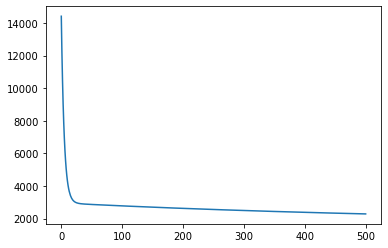

In [18]:
import matplotlib.pyplot as plt
it = list(range(iteraciones + 1))
plt.plot(it, registro_J)
plt.show()